In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn import preprocessing

import warnings 
warnings.filterwarnings('ignore') 

In [2]:
train_data=pd.read_csv('SalaryData_Train(1).csv')
test_data=pd.read_csv('SalaryData_Test(1).csv') 

In [3]:
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
#performing EDA
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [7]:
train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
test_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


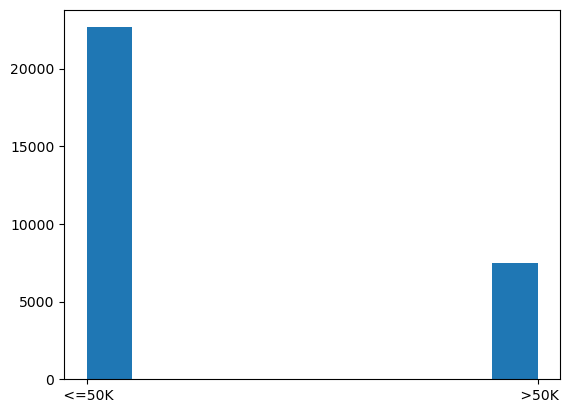

In [9]:
#Histogram on Salary
plt.hist(train_data['Salary'])
plt.show() 

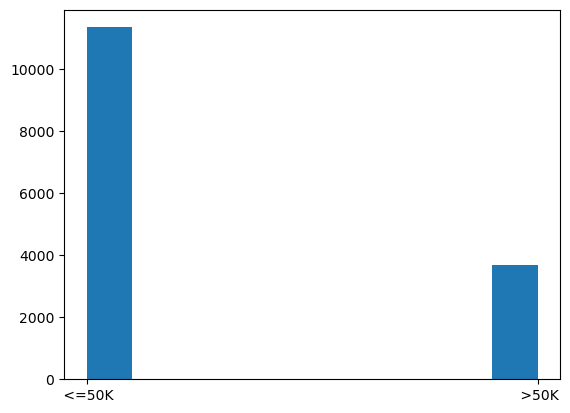

In [10]:
plt.hist(test_data['Salary'])
plt.show()  

In [11]:
training_data = pd.get_dummies(data= train_data, columns= ['workclass','education','maritalstatus','occupation','relationship','race','sex','native' ])
training_data 

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,>50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
testing_data = pd.get_dummies(data= test_data, columns= ['workclass','education','maritalstatus','occupation','relationship','race','sex','native'])
testing_data

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,>50K,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,>50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
en=preprocessing.LabelEncoder()
training_data['Salary']=en.fit_transform(training_data['Salary']) 
testing_data['Salary']=en.fit_transform(testing_data['Salary']) 

In [14]:
training_data 

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
testing_data 

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# Model building

In [16]:
#Training data
x_train = training_data.drop(labels= 'Salary', axis = 1)
y_train = training_data[['Salary']] 

In [17]:
# testing data
x_test = testing_data.drop(labels='Salary',axis = 1)
y_test = testing_data['Salary'] 

# Naive Bayes Model 

# Multinomial Naive Bayes

In [18]:
# Training model
clf = MultinomialNB()
clf.fit(x_train,y_train)
clf.score(x_train,y_train)
y_pred = clf.predict(x_train)
print(classification_report(y_train, y_pred))  

              precision    recall  f1-score   support

           0       0.79      0.96      0.86     22653
           1       0.63      0.21      0.32      7508

    accuracy                           0.77     30161
   macro avg       0.71      0.59      0.59     30161
weighted avg       0.75      0.77      0.73     30161



In [19]:
# Testing model
clf = MultinomialNB()
clf.fit(x_test,y_test)
clf.score(x_test,y_test)
y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred))  

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060

